<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/ps2_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS2 Manipulating Data and Merging - Erick Watt-Udogu 

## **Import: Code**

This section includes import code. 

In [ ]:
import os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import pylab as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)


import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 6.3 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


## **Import: Data**
This section is code for importing data.



### Import: Data File 1: Application Data

In [ ]:
#This is work data I cleaned of identifying information. 
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/appdata.csv", "appdata")

('appdata', <http.client.HTTPMessage at 0x7f6ed41ed070>)

In [ ]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata', 'sample_data']

In [ ]:
appdat=pd.read_csv('appdata')

In [ ]:
appdat.columns

Index(['ID ', 'Degree Type', 'Final Recommended Decision', 'Admit-Coming',
       'Application Created Date', 'Days Before the Beginning of Semester ',
       'Domestic or INTL Applicant', 'Reporting Term', 'Age When Applied',
       'Mailing Zip/Postal Code', 'Mailing State/Province', 'Mailing Country',
       'Most Recent Educational Institution: Account Name', 'Gender', 'Race',
       'Program Selection: Program Selection Name', 'Admissions Status'],
      dtype='object')

In [ ]:
appdat.head(3)

,ID,Degree Type,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Domestic or INTL Applicant,Reporting Term,Age When Applied,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,12/7/2021,273,International,Fall 2022,23.0,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,1/2/2022,247,International,Fall 2022,21.0,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,3/15/2022,175,Domestic,Fall 2022,22.0,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [80]:
appdat.dtypes

ID                                                     int64
Degree Type                                           object
Final Recommended Decision                            object
Admit-Coming                                           int64
Application Created Date                              object
Days Before the Beginning of Semester                  int64
Domestic or INTL Applicant                            object
Reporting Term                                        object
Age When Applied                                     float64
Mailing Zip/Postal Code                               object
Mailing State/Province                                object
Mailing Country                                       object
Most Recent Educational Institution: Account Name     object
Gender                                                object
Race                                                  object
Program Selection: Program Selection Name             object
Admissions Status       

In [81]:
appdat = appdat.drop(['Degree Type','Domestic or INTL Applicant','Age When Applied'],axis=1)

In [82]:
appdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,NaN,0,12/7/2021,273,Fall 2022,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,NaN,0,1/2/2022,247,Fall 2022,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [83]:
appdat = appdat.rename(columns={'Mailing Zip/Postal Code':"Zip", "Mailing State/Province":"State","Mailing Country":"Country" })
appdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,NaN,0,12/7/2021,273,Fall 2022,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,NaN,0,1/2/2022,247,Fall 2022,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [84]:
print(appdat.State.unique())

['Pradesh 2' 'Gujarat' 'New Jersey' 'ENUGU' 'Telangana' 'Beijing'
 'Haryana' 'In-Tn' 'Yunnan' 'Lagos' 'Odisha' 'Delhi' 'Rajasthan'
 'West Bengal' 'Tamil Nadu' 'Maryland' 'Uttar Pradesh' 'IN' 'New York'
 'Ohio' nan 'west bengal' 'Shanxi' 'Assam' 'England'
 'Federal Capital Territory' 'mazandaran' 'Pennsylvania' 'Illinois'
 'Tehran' 'Delaware' 'Ardebi' 'Massachusetts' 'West Virginia' 'PA'
 'Virginia' 'NJ' 'In-Hr' 'AN' 'Rivers state' 'Baranya' 'Colorado'
 'Banasree' 'Plateau' 'Saint Catherine' 'Serekunda' 'Imo'
 'North Rhine-Westphalia' 'California' 'Anambra' 'Kerala' 'Eastern'
 'Ashanti' 'Washington' 'MAHARASHTRA' 'Punjab' 'Rhode Island' 'Dhaka'
 'Dhaka Division' 'Missouri' 'Bagmati' 'Seoul' 'Edo' 'Karnataka'
 'Maharashtra' 'Tamilnadu' 'Western Area' 'Kinondoni' 'LAGOS' 'Rivers'
 'TELANGANA' 'Ashanti Region' 'Ghana' 'Western Province' 'NY' 'Ondo'
 'Kiambu' 'Madhya Pradesh' 'Greater Accra' 'Kaduna' 'Isfahan' 'In-Dl'
 'Harare' 'New Hampshire' 'Indiana' 'Tabuk' 'FCT' 'Oregon' 'AP' 'Osun'
 '

Text(0.5, 1.0, 'Number of Applications by State: Domesting and International')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'States')

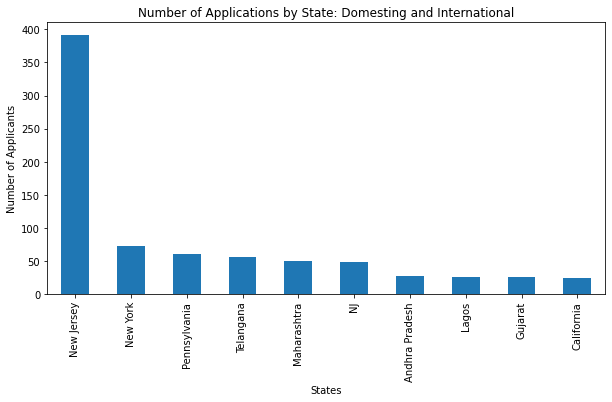

In [85]:
appdat.State.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by State: Domesting and International")
plt.ylabel("Number of Applicants")
plt.xlabel("States")

In [86]:
appdat["State"].value_counts()

New Jersey       391
New York          73
Pennsylvania      60
Telangana         56
Maharashtra       50
                ... 
In-Rj              1
In-Up              1
AndhraPradesh      1
State              1
Sylhet             1
Name: State, Length: 264, dtype: int64

Text(0.5, 1.0, 'Number of Applications by State: Domesting and International')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'States')

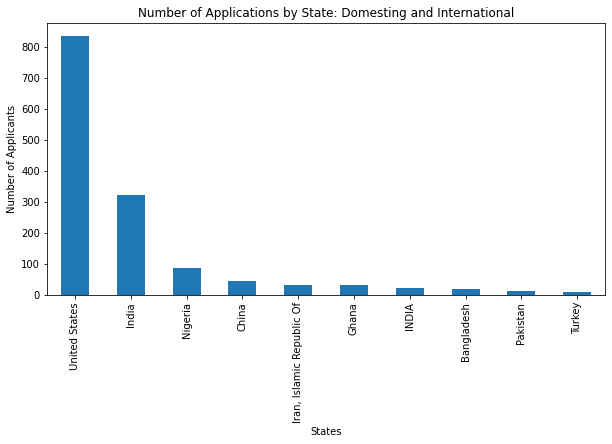

In [87]:
appdat.Country.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by State: Domesting and International")
plt.ylabel("Number of Applicants")
plt.xlabel("States")

In [88]:
appdat["Country"].value_counts()

United States                835
India                        320
Nigeria                       85
China                         44
Iran, Islamic Republic Of     32
                            ... 
Singapore                      1
Hungary                        1
Senegal                        1
Kyrgyzstan                     1
Azerbaijan                     1
Name: Country, Length: 62, dtype: int64

In [89]:
print(appdat.Country.unique())

['Nepal' 'India' 'United States' 'Nigeria' 'China' 'INDIA' 'Bangladesh'
 'United Kingdom' 'Iran, Islamic Republic Of' 'Turkey' 'Ghana'
 'Kyrgyzstan' 'Senegal' 'Korea, Republic of' 'Egypt' 'Hungary' 'Jamaica'
 'Singapore' 'Taiwan' 'Gambia' 'Germany' 'Pakistan' nan 'BANGLADESH'
 'United States of America' 'Sierra Leone' 'Tanzania, United Republic of'
 'Sri Lanka' 'Kenya' 'Zimbabwe' 'Saudi Arabia' 'Trinidad and Tobago'
 'South Africa' 'Malawi' 'Italy' 'France' 'Hong Kong' 'Liberia'
 'Taiwan, Province Of China' 'Mexico' 'Russian Federation' 'Canada'
 'United Arab Emirates' 'Brazil' 'Bahrain' 'Morocco' 'Kuwait' 'Uruguay'
 'Qatar' 'Bahamas' 'Puerto Rico' 'Peru' 'Philippines' 'Costa Rica'
 'Greece' 'Estonia' 'Malaysia' 'Lebanon' 'Latvia' 'Israel' 'Belgium'
 'Cameroon' 'Azerbaijan']


In [90]:
usappdat = appdat.query("Country=='United States'")
usappdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App


In [91]:
print(usappdat.State.unique())

['New Jersey' 'Maryland' 'New York' 'Ohio' 'Pennsylvania' 'Illinois'
 'Delaware' 'Massachusetts' 'West Virginia' 'PA' 'Virginia' 'NJ'
 'Colorado' 'California' 'Washington' 'Rhode Island' 'Missouri' 'NY'
 'New Hampshire' 'Indiana' 'Oregon' 'AP' 'AZ' 'FL' 'Arizona' 'Texas'
 'Wisconsin' 'North Carolina' 'Minnesota' 'Georgia' 'Iowa' 'Alabama' 'MA'
 'Tennessee' 'Mississippi' 'District Of Columbia' 'Florida' 'Montana'
 'Connecticut' 'WI' 'OH' 'MD' 'Vermont' 'Lousiana' 'Nevada' 'MI' 'CA'
 'Michigan' 'DC' 'Nj' 'new jersey' 'TX' 'Louisiana' 'Idaho' 'Kansas' 'CT'
 'RI' 'md' 'AE' 'IN' 'NM' 'Nebraska' 'Maine' 'Arkansas' 'texas'
 'Armed Forces' 'New Mexico' 'South Carolina' 'District of Columbia' 'KS'
 'pa' 'nj' 'OK' 'KY']


In [92]:
usappdat['State']=usappdat['State'].replace(['NJ','Nj','new jersey','nj'],'New Jersey')

<ipython-input-92-4fbae95450e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usappdat['State']=usappdat['State'].replace(['NJ','Nj','new jersey','nj'],'New Jersey')


In [93]:
print(usappdat.State.unique())

['New Jersey' 'Maryland' 'New York' 'Ohio' 'Pennsylvania' 'Illinois'
 'Delaware' 'Massachusetts' 'West Virginia' 'PA' 'Virginia' 'Colorado'
 'California' 'Washington' 'Rhode Island' 'Missouri' 'NY' 'New Hampshire'
 'Indiana' 'Oregon' 'AP' 'AZ' 'FL' 'Arizona' 'Texas' 'Wisconsin'
 'North Carolina' 'Minnesota' 'Georgia' 'Iowa' 'Alabama' 'MA' 'Tennessee'
 'Mississippi' 'District Of Columbia' 'Florida' 'Montana' 'Connecticut'
 'WI' 'OH' 'MD' 'Vermont' 'Lousiana' 'Nevada' 'MI' 'CA' 'Michigan' 'DC'
 'TX' 'Louisiana' 'Idaho' 'Kansas' 'CT' 'RI' 'md' 'AE' 'IN' 'NM'
 'Nebraska' 'Maine' 'Arkansas' 'texas' 'Armed Forces' 'New Mexico'
 'South Carolina' 'District of Columbia' 'KS' 'pa' 'OK' 'KY']


In [94]:
njappdat = usappdat.query("State=='New Jersey'")
njappdat.head(3)

,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App


In [99]:
njappdat['C_Zip']=njappdat['Zip'].str[:5]
njappdat.head(3)

<ipython-input-99-088877dd01eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njappdat['C_Zip']=njappdat['Zip'].str[:5]


,ID,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Reporting Term,Zip,State,Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status,C_Zip
2,3,NaN,0,3/15/2022,175,Fall 2022,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App,07009
3,4,NaN,0,3/31/2022,159,Fall 2022,07726-4660,New Jersey,United States,Suny Colg Geneseo,Female,Hispanic or Latino; White,Biology: Computational and Integrative (MS),Started App,07726
5,6,NaN,0,4/20/2022,272,Spring 2023,08755-1914,New Jersey,United States,Essex County College,Male,Black or African American,Biology: Computational and Integrative (MS),Started App,08755


### Import: Data File 2: New Jersey Unemployment Data by County

In [24]:
#Got this code from Social Explorer https://www.socialexplorer.com/tables/US_unemployment_2021/R13293445
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/R13290836_SL050.csv", "njunemp21.csv")

('njunemp21.csv', <http.client.HTTPMessage at 0x7f6e9e39c5e0>)

In [25]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'njunemp21.csv', 'appdata', 'sample_data']

In [26]:
njunemp=pd.read_csv('njunemp21.csv')

In [27]:
njunemp.columns

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QNAME', 'Geo_NATION', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_MSA', 'ORG_US_007_001', 'ORG_US_007_002',
       'ORG_US_007_003', 'ORG_US_007_004', 'ORG_US_Unemployment_027_001',
       'ORG_US_Unemployment_027_002', 'ORG_US_Unemployment_027_003',
       'ORG_US_Unemployment_027_004', 'ORG_US_Unemployment_020_001',
       'ORG_US_Unemployment_020_002', 'ORG_US_Unemployment_020_003',
       'ORG_US_Unemployment_020_004', 'ORG_US_035_001', 'ORG_US_035_002',
       'ORG_US_035_003', 'ORG_US_035_004'],
      dtype='object')

In [28]:
njunemp.head(3)

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_MSA,ORG_US_007_001,ORG_US_007_002,ORG_US_007_003,...,ORG_US_Unemployment_027_003,ORG_US_Unemployment_027_004,ORG_US_Unemployment_020_001,ORG_US_Unemployment_020_002,ORG_US_Unemployment_020_003,ORG_US_Unemployment_020_004,ORG_US_035_001,ORG_US_035_002,ORG_US_035_003,ORG_US_035_004
0,34001,Atlantic County,"Atlantic County, New Jersey",0,34,1,NaN,121301,108221,13080,...,30795,24.0,-7080,10635,-17715,-13.2,-5.514835,10.898080,-57.525572,-55.000000
1,34003,Bergen County,"Bergen County, New Jersey",0,34,3,NaN,469719,435114,34605,...,70140,14.1,-26560,8975,-35535,-6.7,-5.351828,2.106120,-50.662960,-47.517730
2,34005,Burlington County,"Burlington County, New Jersey",0,34,5,NaN,232113,216827,15286,...,27756,11.8,-2988,9482,-12470,-5.2,-1.270943,4.573055,-44.927223,-44.067797


In [29]:
njunemp.dtypes

Geo_FIPS                         int64
Geo_NAME                        object
Geo_QNAME                       object
Geo_NATION                       int64
Geo_STATE                        int64
Geo_COUNTY                       int64
Geo_MSA                        float64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
ORG_US_007_004                 float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
ORG_US_Unemployment_027_004    float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
ORG_US_035_004                 float64
dtype: object

In [30]:
njunemp = njunemp.drop(['Geo_FIPS','Geo_QNAME','Geo_NATION','Geo_COUNTY','Geo_MSA'],axis=1)

In [31]:
njunemp.dtypes

Geo_NAME                        object
Geo_STATE                        int64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
ORG_US_007_004                 float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
ORG_US_Unemployment_027_004    float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
ORG_US_035_004                 float64
dtype: object

In [32]:
njunemp = njunemp.rename(columns={'Geo_NAME':"County", "ORG_US_007_004":"Unemployment2021","ORG_US_Unemployment_027_004":"Unemployment2020","ORG_US_035_004":"PercentageChange"})

In [33]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
ORG_US_007_001                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
ORG_US_Unemployment_027_001      int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [59]:
#When you put quotes around stdev, it doesn't work. 
njunemp.agg({'Unemployment2020':['mean','median',stdev], 'Unemployment2021':['mean','median',stdev],'PercentageChange':['mean','median',stdev] })

,Unemployment2020,Unemployment2021,PercentageChange
mean,13.857143,7.595238,-44.823672
median,13.200000,7.100000,-45.384615
stdev,3.000262,1.425299,4.966793


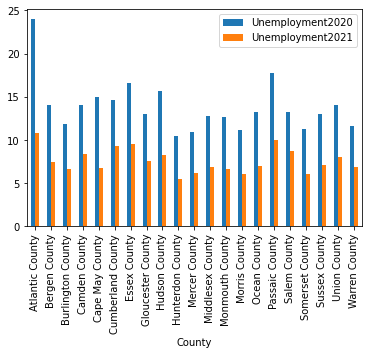

In [55]:
njunemp.plot(x="County", y=["Unemployment2020", "Unemployment2021"], kind="bar")

In [49]:
njunemp = njunemp.rename(columns={'ORG_US_007_001':"LaborForce2021", "ORG_US_Unemployment_027_001":"LaborForce2020"})

In [50]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
LaborForce2021                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
LaborForce2020                   int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [58]:
njunemp.agg({'LaborForce2020':['mean','median',stdev], 'LaborForce2021':['mean','median',stdev] })

,LaborForce2020,LaborForce2021
mean,220332.904762,214303.047619
median,235101.000000,232113.000000
stdev,138358.206270,132198.286191


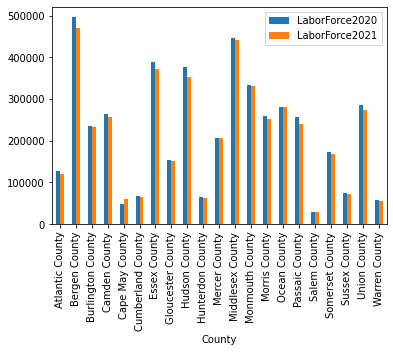

In [53]:
njunemp.plot(x="County", y=["LaborForce2020", "LaborForce2021"], kind="bar")

In [77]:
njunemp['County'] = njunemp['County'].str.replace('County','')

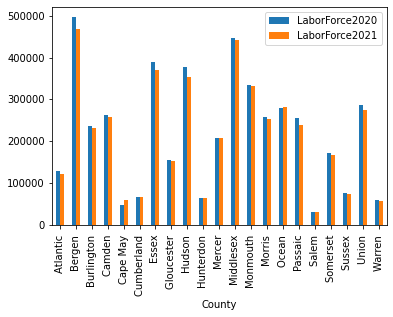

In [78]:
njunemp.plot(x="County", y=["LaborForce2020", "LaborForce2021"], kind="bar")

### Import: Data File 3: New Jersey Zip Codes




In [ ]:
#Found this import code at https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 save for later 
#Found the data on a background check website. It was the cleanest file and I wanted to test the import from html table code. 
pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')

[                   City ZIP Code      County
 0                   A C    08401    ATLANTIC
 1              ABERDEEN    07747    MONMOUTH
 2               ABSECON    08201    ATLANTIC
 3       ABSECON HEIGHTS    08201    ATLANTIC
 4     ABSECON HIGHLANDS    08201    ATLANTIC
 ...                 ...      ...         ...
 1250        WRIGHTSTOWN    08562  BURLINGTON
 1251            WYCKOFF    07481      BERGEN
 1252          YARDVILLE    08620      MERCER
 1253           ZAREPATH    08873    SOMERSET
 1254          ZAREPHATH    08890    SOMERSET
 
 [1255 rows x 3 columns]]

In [ ]:
pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')[0]

,City,ZIP Code,County
0,A C,08401,ATLANTIC
1,ABERDEEN,07747,MONMOUTH
2,ABSECON,08201,ATLANTIC
3,ABSECON HEIGHTS,08201,ATLANTIC
4,ABSECON HIGHLANDS,08201,ATLANTIC
...,...,...,...
1250,WRIGHTSTOWN,08562,BURLINGTON
1251,WYCKOFF,07481,BERGEN
1252,YARDVILLE,08620,MERCER
1253,ZAREPATH,08873,SOMERSET


In [60]:
njzips=pd.read_html('https://www.corragroup.com/new-jersey-county-lookup.html')[0]

In [61]:
njzips.head(3)

,City,ZIP Code,County
0,A C,08401,ATLANTIC
1,ABERDEEN,07747,MONMOUTH
2,ABSECON,08201,ATLANTIC


In [72]:
njzips = njzips.rename(columns={'ZIP Code':"C_Zip"})

In [73]:
njzips.head(3)

,City,C_Zip,County
0,A C,08401,Atlantic
1,Aberdeen,07747,Monmouth
2,Absecon,08201,Atlantic


In [74]:
njzips["County"]= njzips["County"].str.title()

In [75]:
njzips.head(3)

,City,C_Zip,County
0,A C,08401,Atlantic
1,Aberdeen,07747,Monmouth
2,Absecon,08201,Atlantic


In [67]:
njzips["City"]= njzips["City"].str.title()

## Merging

In [100]:
njappdat.dtypes

ID                                                    int64
Final Recommended Decision                           object
Admit-Coming                                          int64
Application Created Date                             object
Days Before the Beginning of Semester                 int64
Reporting Term                                       object
Zip                                                  object
State                                                object
Country                                              object
Most Recent Educational Institution: Account Name    object
Gender                                               object
Race                                                 object
Program Selection: Program Selection Name            object
Admissions Status                                    object
C_Zip                                                object
dtype: object

In [101]:
njappmerge=njappdat[['ID ','C_Zip']]
njappmerge.head(3)

,ID,C_Zip
2,3,07009
3,4,07726
5,6,08755


In [102]:
njzips.dtypes

City      object
C_Zip     object
County    object
dtype: object

In [103]:
njzipsmerge=njzips[['C_Zip','County']]
njzipsmerge.head(3)

,C_Zip,County
0,08401,Atlantic
1,07747,Monmouth
2,08201,Atlantic


In [106]:
njappzip=njappmerge.merge(njzipsmerge, on='C_Zip',how='outer',indicator=True)
njappzip.dtypes

ID         float64
C_Zip       object
County      object
_merge    category
dtype: object

In [110]:
njappzip.head(10)
njappzip.tail(10)

,ID,C_Zip,County,_merge
0,3.0,07009,Essex,both
1,3.0,07009,Essex,both
2,4.0,07726,Monmouth,both
3,4.0,07726,Monmouth,both
4,4.0,07726,Monmouth,both
5,6.0,08755,NaN,left_only
6,911.0,08755,NaN,left_only
7,7.0,08850,Middlesex,both
8,14.0,07052,Essex,both
9,14.0,07052,Essex,both


,ID,C_Zip,County,_merge
1834,NaN,08252,Cape May,right_only
1835,NaN,07765,Monmouth,right_only
1836,NaN,08561,Mercer,right_only
1837,NaN,08095,Camden,right_only
1838,NaN,08095,Camden,right_only
1839,NaN,07075,Bergen,right_only
1840,NaN,07075,Bergen,right_only
1841,NaN,07095,Middlesex,right_only
1842,NaN,08620,Mercer,right_only
1843,NaN,08890,Somerset,right_only


In [111]:
njappzipmerge = njappzip.query("_merge=='both'")
njappzipmerge.head(3)
njappzipmerge.tail(3)

,ID,C_Zip,County,_merge
0,3.0,07009,Essex,both
1,3.0,07009,Essex,both
2,4.0,07726,Monmouth,both


,ID,C_Zip,County,_merge
920,1495.0,08106,Camden,both
922,1520.0,07040,Essex,both
923,1520.0,07040,Essex,both


Text(0.5, 1.0, 'Number of Applications by County')

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'County Name')

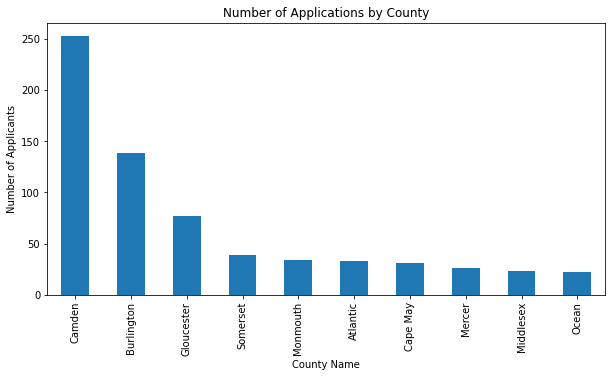

In [119]:
#this looks right
njappzipmerge.County.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title("Number of Applications by County")
plt.ylabel("Number of Applicants")
plt.xlabel("County Name")

In [113]:
njunemp.dtypes

County                          object
Geo_STATE                        int64
LaborForce2021                   int64
ORG_US_007_002                   int64
ORG_US_007_003                   int64
Unemployment2021               float64
LaborForce2020                   int64
ORG_US_Unemployment_027_002      int64
ORG_US_Unemployment_027_003      int64
Unemployment2020               float64
ORG_US_Unemployment_020_001      int64
ORG_US_Unemployment_020_002      int64
ORG_US_Unemployment_020_003      int64
ORG_US_Unemployment_020_004    float64
ORG_US_035_001                 float64
ORG_US_035_002                 float64
ORG_US_035_003                 float64
PercentageChange               float64
dtype: object

In [126]:
njunempmerge=njunemp[['County','Unemployment2021']]
njunempmerge.head(3)

,County,Unemployment2021
0,Atlantic,10.8
1,Bergen,7.4
2,Burlington,6.6


In [156]:
njappzipmerge.dtypes

ID        float64
County     object
dtype: object

In [158]:
print(njappzipmerge.County.unique())

['Essex' 'Monmouth' 'Middlesex' 'Sussex' 'Camden' 'Burlington'
 'Gloucester' 'Ocean' 'Somerset' 'Hudson' 'Cumberland' 'Atlantic' 'Mercer'
 'Cape May' 'Bergen' 'Warren' 'Morris' 'Hunterdon' 'Salem' 'Union'
 'Passaic']


In [157]:
njunempmerge.dtypes

County               object
Unemployment2021    float64
dtype: object

In [159]:
#There is the problem. The space.
print(njunempmerge.County.unique())

['Atlantic ' 'Bergen ' 'Burlington ' 'Camden ' 'Cape May ' 'Cumberland '
 'Essex ' 'Gloucester ' 'Hudson ' 'Hunterdon ' 'Mercer ' 'Middlesex '
 'Monmouth ' 'Morris ' 'Ocean ' 'Passaic ' 'Salem ' 'Somerset ' 'Sussex '
 'Union ' 'Warren ']


### Import: Data: Notes, Observations and Next Steps

**App Data File** 

*   Isolate New Jersey Applicants
*   Clean plus four from zip codes 
*   Rename "Mailing Zip/Postal Code" to "Zip Code"
* File has no county names information will need other files to merge. 

**NJ Unemployment File**

* 



## Manipulating Data: Renaming Variables